Week 02 Day 03: Data formatting, SQL and more text processing
=================

Today we will be looking at some further data formatting. We will also be introducing SQL or Structured Query Language. 

Learning goals: 
- Understand the use of sql through sqlite. 
- Making use of Map / Apply / Lambda. 
- Parsing Dates 
- Building further regular expressions. 

We will be using some old data related to the 2016 UK election, but it's useful data. 

In [ ]:
from IPython.display import display
%pylab inline 

# Using sql databases

SQL stands for Structured Query Language. It is a way to store data in relational tables. This is to say tables that follow the row / column format. Each 'database' can store multiple tables. 

There has been a movement in recent years away from relational databases towards newer forms of data stores, such as GraphDB and MongoDB, as part of the 'noSQL' paradigm. First, that's silly. Seccond, it's a little presumptuous to assume that other data stores can do the trick better. 
- MongoDB is a store for json-like objects. It's fast, simple and not so powerful except for queuing systems. 
- Neo4j is a 'graphdb' that stores entries as nodes and edges. It's hard to wrap your head around, but it does make some form of querying relatively straightforward that would otherwise not be the case. 

Having worked with Mongo, Neo4j and SQL, I can confidently say that SQL has a very prominent place in data stores. Lately, a number of domains have started to return to SQL databases. This is because while the data can be stored in other more flexible formats, ofte formats that mimic the data in other contexts, they are not so amenable to post-processing. 

Tables in SQL can be **indexed** or not. When they are indexed, using a 'key' it is easier to query and search for data. Keys keep tables organized but are not necessary. A 'primary key' is an index where each entry is unique.

SQL is structured query language, but not a specific database type. Most SQL is interoperable, but some is specific to the type of database. There are also SQL flavours that are used in APIs but restrict certain kinds of queries. For a while Facebook had FQL which allowed developers to query for data on select tables. This has been deprecated in favour of a graph database structure. Some example databases are:
- ```Oracle```. The version in use in many industries. 
- ```MySQL```. An open source SQL implementation in use in a lot of server applications. It is the M in a 'LAMP stack', which stands for Linux, Apache, MySQL and PHP, which for many was the building block of dynamic webpages. It is being slowly replaced by NodeJS variants such as React, but is still a common way to build and serve dynamic content. 
- ```PostGRES```. A version that's often used in academia and some other environments. It can be a bit more tricky to set up than MySQL. 
- ```SQLite```. The only one of these flavours that isn't designed to be interacted with via a server. SQLite databases exist all over your computer, particularly on a mac. This is because you can just read and write to a SQLite database as if it were a file. 

We can use SQLite through a number of modules. Two popular ones in python are ```sqlalchemy``` and ```sqlite3```. The former is a little more 'pythonic' in that you can interface with the database through objects and methods. SQLite3 is a little more of a wrapper around direct SQL commands. We will use SQLite3 because it is less abstract as well as allowing you to see SQL commands directly. Below we will see how to open and view details about a database. 



In [5]:
import sqlite3 as lite
con = lite.connect('example.db')

cursor = con.cursor()
cursor.execute('''
    CREATE TABLE if not exists users(id INTEGER PRIMARY KEY, name TEXT,
                       phone TEXT, email TEXT unique)
''')
con.commit()

 query To use SQL in 



Below is the code used to take data from an SQL database (in this case sqlite) and create the tables required for PANDAS. As we can see, it is a very simple process to read from a table. We first write a command in SQL and then send that command to a connection. 

We will not be teaching SQL per se, but it is worth introducing. I will here discuss sqlite as it is especially handy. This is because unlike MySQL or PostGres you do not need to run a server. SQLite databases are local files. In many cases sqlite is just as fast as other databases. See the course Big Data Analysis for more examples of how to work with databases. 

If you just want to pipe SQL into a data frame, here are some examples. In general the syntax is: 

~~~
DATAFRAME = pd.read_sql(SQL_COMMAND,sqlite3.connect(DATABASE_FILE)
~~~

In [4]:
# Note that youcan view the whole table with SQLite browser: http://sqlitebrowser.org
import sqlite3

df = pd.read_sql("select * from roottweets",sqlite3.connect("may5-6withreplies.db"))
display(df.head())

df2 = pd.read_sql("select username, count(username) from roottweets group by( username) order by count(username) DESC",sqlite3.connect("may5-6withreplies.db"))
display(df2.head())


,tweet_id,user_id,username,date,text
0,595484506439684096,376399949,PlaidDC_CS,2015-05-05 07:05:44.000000,"RT @JamesLuchte: Discovering #Plaid #Cymru, th..."
1,595577717980037122,80021045,timfarron,2015-05-05 13:16:07.000000,@BrynKewley @nick_clegg @EdwardDaveyMP @LibDem...
2,595712363963281410,76969741,carlquilliam,2015-05-05 22:11:10.000000,RT @johnestevens: Ukip suspends candidate from...
3,595619170773028867,19451651,annesnelgrove,2015-05-05 16:00:51.000000,RT @edballsmp: Huge turnout and big momentum i...
4,595710436516958208,27101173,SteveUncles,2015-05-05 22:03:30.000000,"With Labour &amp; the SNP in Government, the a..."


,username,count(username)
0,HOWnotWHO,613
1,johnnymercer81,352
2,Vaughan_Wms,319
3,UKIPbevand7,314
4,james4suffolk,301


# Dates and the datetime module 

Datetime can be a real nuisance when the date times are stored in a number of different ways. We will deal with one way contained within the tweets from the root tweets. These are stored as strings. Querying the root tweets we can see how they are stored. 

In [5]:
print(   type(df["date"][0]),    df["date"][0])

<class 'str'> 2015-05-05 07:05:44.000000


So we can see that it is a string, when we really want a date. So we can do this the easy way and the hard way. The easy way is to tell PANDAS to simply convert it and take our chances. We shall do that. Then I shall show you the hard way. 

The hard way is not to use PANDAS but the built-in date time module. Here we can specify using escape codes the different ways that a date is supposed to be formatted. In this case:

~~~
tweetdate = "2015-05-05 07:05:44.000"
~~~

Can be read as

~~~
YEAR-MM-DD HH:MM:SS.FFF
~~~

And we can then build a datetime parser for this in the following way: 

~~~
tweetdateobject = datetime.strptime(tweetdate, '%Y-%m-%d %H:%M:%S.%f')
~~~

Notice the %Y and %m symbols. These refer to four digit year and month. See page 292 for an example of more of these. 

In [8]:
from datetime import datetime

tweetdate = "2015-05-05 07:05:44.000"

tweetdateobject = datetime.strptime(tweetdate, '%Y-%m-%d %H:%M:%S.%f')
print(type(tweetdateobject),tweetdateobject)

<class 'datetime.datetime'> 2015-05-05 07:05:44


In [10]:
tdo = tweetdateobject
print(tdo.date)
print(tdo.minute)
print(type(tdo.time()))
# help(tdo)

<built-in method date of datetime.datetime object at 0x10d53b490>
5
<class 'datetime.time'>


In [6]:
import time
help(time.strptime)

Help on built-in function strptime in module time:

strptime(...)
    strptime(string, format) -> struct_time
    
    Parse a string to a time tuple according to a format specification.
    See the library reference manual for formatting codes (same as
    strftime()).
    
    Commonly used format codes:
    
    %Y  Year with century as a decimal number.
    %m  Month as a decimal number [01,12].
    %d  Day of the month as a decimal number [01,31].
    %H  Hour (24-hour clock) as a decimal number [00,23].
    %M  Minute as a decimal number [00,59].
    %S  Second as a decimal number [00,61].
    %z  Time zone offset from UTC.
    %a  Locale's abbreviated weekday name.
    %A  Locale's full weekday name.
    %b  Locale's abbreviated month name.
    %B  Locale's full month name.
    %c  Locale's appropriate date and time representation.
    %I  Hour (12-hour clock) as a decimal number [01,12].
    %p  Locale's equivalent of either AM or PM.
    
    Other codes may be available on yo

# Diversion: Using Lambda to apply a function inside a loop.

"Lambda" is a tricky but highly useful command, especially when paired with "map". Map will apply a function to each element of a series, lambda will allow us to use each element in a function. It is more clear with an example. We can employ regular expressions in this way to clean up our search strings. 

The general syntax is: 

~~~
SERIES = OLD_SERIES.map(lambda CELL: Some_Function(CELL)) 
~~~

In [24]:
# Lambda functions are useful in all sorts of ways. 
# For example, we could create a list of all the instances of @ mentions
import re 

rMention = re.compile("@\w+")

df["mentionlist"] = df["text"].map(lambda sasdfasdf: rMention.findall(sasdfasdf))

# for c,cell in enumerate(df["text"]):
#     df.loc[c,"mentionlist2"] = rMention.findall(cell)

display(df["mentionlist"])
# display(df["mentionlist2"].head(10))

0                                           [@JamesLuchte]
1        [@BrynKewley, @nick_clegg, @EdwardDaveyMP, @Li...
2                                          [@johnestevens]
3                             [@edballsmp, @annesnelgrove]
4                                                       []
5                                                       []
6           [@jpapworth, @sidmouthherald, @EDevonAlliance]
7                                         [@Conservatives]
8                                               [@YouTube]
9                                          [@An_Phoblacht]
10                                         [@discovery77_]
11                                                      []
12                                              [@ambermb]
13                                                      []
14       [@Nat_Worst, @Nigel_Pickover, @thedeniseb, @BB...
15                        [@grahamemorris, @LouiseBaldock]
16                                       [@Markfergusonu

In [33]:
list1 = [[1,3],[5,7],[8,10,20]]
series1 = pd.Series(list1)
list2 = series1.map(lambda num: [process(username) for usernames in num])

print(list1,"\n",list2)

[[1, 3], [5, 7], [8, 10, 20]] 
 0              []
1             [9]
2    [10, 12, 22]
dtype: object


In [21]:
rr = list(range(0,20))
rr2 = list(range(20,40))

print(rr,rr2)
for c,i in enumerate(rr):
    print(c,rr[c])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19


You will also notice that I have now placed a list INSIDE a series. Indeed, a series can take all kinds of objects. What might we want to do with that series? Well, if we go by tweet we might want to check the distribution of number of @mentions in the tweets. This would require a second lambda. See for yourself:

In [22]:
df["mentionnum"] = len(df["mentionlist"])
print(df["mentionnum"].head())
print()
# Notice that len was the length of the entire series, not the per-row length. 

df["mentionnum"] = df["mentionlist"].map(lambda x: len(x))
display(df["mentionnum"].head())
print()
df["mentionnum"].value_counts()

# Recall in week one we used a mapper to clean some data. We mapped x based on a dictionary value. 
# Here we are using lambda to create an 'ad hoc' function.



0    60068
1    60068
2    60068
3    60068
4    60068
Name: mentionnum, dtype: int64



0    1
1    4
2    1
3    2
4    0
Name: mentionnum, dtype: int64

1     25413
2     13276
0     11610
3      5286
4      2201
5      1062
6       631
7       269
8       168
9       115
10       28
11        9
Name: mentionnum, dtype: int64

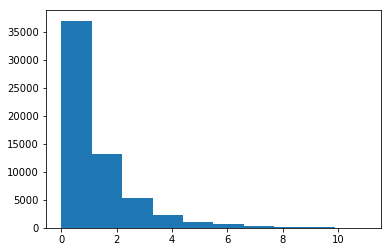

In [34]:
plt.hist(df["mentionnum"])
plt.show()

In [36]:
pd.set_option("display.max_colwidth",-1)
display(df[df["mentionnum"] == 11]["text"])

print()

pd.set_option("display.max_colwidth",40)
display(df[df["mentionnum"] == 11]["text"])

8320     RT @foylejobs: @NIIRTA RT @Legenderryhour @dcsdcouncil @CoDerryAirport @Derry_Chamber @FoyleSDLP @DerrySinnFein @Derryvisitor @Gary_Middleton @ICE_NIreland    
16869    RT @MargaretPinder: @DianaJohnsonMP @DrAyshaRaza @OnnMel @jackycrawford @Debbie_abrahams @YvetteCooperMP @Mary4Wakefield @stellacreasy @JoBrand_ @ThurrockPolly
22932    RT @n10hairbear: Vote @UKLabour @CatherineWest1 @sarahsackman @olivercoppard @MGreenwoodWW @willscobie @coyleneil @WillJMartindale @joanryanEnfield @RupaHuq   
24727    RT @n10hairbear: Vote @UKLabour @CatherineWest1 @sarahsackman @olivercoppard @MGreenwoodWW @willscobie @coyleneil @WillJMartindale @joanryanEnfield @RupaHuq   
33051    RT @MedMarijuanaUK: @MedMarijuanaUK @BipLing @Caradelevingne @Clarkfrenchuk @BJGoldsmith `@sensibubble  @ZacGoldsmith @MedMarLegal @lilyallen @AlfieAllen      
35216    RT @jamiewisemansnj: @stroud_neil @SLunnon1 @DavidEDrew @CasAnnStephens @richwi1son @MyStroudMP @StroudTV @StroudGreens @stroudconservat @StroudLa

8320     RT @foylejobs: @NIIRTA RT @Legenderr...
16869    RT @MargaretPinder: @DianaJohnsonMP ...
22932    RT @n10hairbear: Vote @UKLabour @Cat...
24727    RT @n10hairbear: Vote @UKLabour @Cat...
33051    RT @MedMarijuanaUK: @MedMarijuanaUK ...
35216    RT @jamiewisemansnj: @stroud_neil @S...
41511    RT @CroPage: N'Milo! @james4suffolk ...
51642    RT @a_cuthbert: And @MatthewRDavis85...
55877    RT @MargaretPinder: @DianaJohnsonMP ...
Name: text, dtype: object

In [37]:
# Now let's apply this to the date column

df["datetime"] = df["date"].map(lambda entry: datetime.strptime(entry, '%Y-%m-%d %H:%M:%S.%f'))
print(df["datetime"].head())

0   2015-05-05 07:05:44
1   2015-05-05 13:16:07
2   2015-05-05 22:11:10
3   2015-05-05 16:00:51
4   2015-05-05 22:03:30
Name: datetime, dtype: datetime64[ns]


In [38]:
# With the columns formatted as timestamps we can now query them as such. 
# We can get the min (i.e. earliest) or the max(i.e. latest) or the time delta, 
# which is the difference between two time periods

maxtime = max(df["datetime"])
mintime = min(df["datetime"])
print(maxtime)
print(type(mintime))
print(type(maxtime - mintime))
print(maxtime - mintime)

2015-05-06 22:59:58
<class 'pandas._libs.tslib.Timestamp'>
<class 'pandas._libs.tslib.Timedelta'>
1 days 22:59:51


# Reading Excel documents 

As you will discover, exporting to CSV from excel will not always work as planned. PANDAS has features to read from excel directly. 


In [41]:
dfGlobal = pd.read_excel("world_bank_country_data.xlsx") # note this may not work on your computer.

display(dfGlobal.head())

print("oops")

,Country Name,Country Code,Series Name,Series Code,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,75.1544,89.5,..,..,..
1,Afghanistan,AFG,"Access to electricity, rural (% of r...",EG.ELC.ACCS.RU.ZS,70.1294,87.8,..,..,..
2,Afghanistan,AFG,"Access to electricity, urban (% of u...",EG.ELC.ACCS.UR.ZS,89.5526,98.7,..,..,..
3,Afghanistan,AFG,Adolescent fertility rate (births pe...,SP.ADO.TFRT,82.2638,76.7336,71.2034,..,..
4,Afghanistan,AFG,Adults (ages 15+) newly infected wit...,SH.HIV.INCD,1000,1000,1000,1000,..


oops


Installing R in Jupyter
===

Untested on windows, but on mac it is really easy (source: https://irkernel.github.io/installation/ ): 
1. Open an R shell in the terminal. 
2. Paste this command: 
~~~ r
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
~~~
3. Then this one
~~~ r
devtools::install_github('IRkernel/IRkernel')
~~~
4. Then this one
~~~ r
IRkernel::installspec()
~~~

Please note , this will not work from the R app or RStudio. 

# The summative 

First, let's review the document that you were given. 

Now below, here is the guidance that I will give to the second marker. 


Guidance: 
As you will note, the students have been asked to write an essay based on a data merging task. This task should exemplify the data wrangling skills learned in class. To this end we are looking for figures, tables or findings that show evidence of the following:
1. **Judiciousness with code**: Did the candidate check to make sure countries were merged correctly? How did the candidate address issues with missing data? Which year column(s) was chosen for the analysis and how was this determined. Has the candidate articulated the decisions that went into the final output clearly and exhaustively. Have they overcompensated by being didactic on a line-by-line level or more judicious by highlighting key decisions.
2. **Proficiency with goals**: Looking at both the essay and the code in the appendix is it clear that the candidate understands concepts like abstraction. That is, are they using map, list comprehensions, and functions to create clear modular code or do they write a single long series of steps with for loops? Is the code commented and easy to follow?
3. **Clarity of output**: Is the candidate able to express any relationships or descriptive statistics in a clear manner? Have they formatted their output in an academic form or are they pasting (or worse screenshotting) output directly from Jupyter? Are figures labelled clearly including labels on the x and y axis where appropriate. 
4. **Research questions and literature review**: This is not a substantive class and so the emphasis on questions of interest to social science are not of primary importane. However, the essay should still be internally coherent. Is the story being told about the data purposeful or ad hoc? Does the candidate articulate the research making reference to external literature? Overall, how does the candidate _frame_ the data. 




The upcoming schedule
- **End of class**: Feedback session with Victoria (Bernie leaves the room). Please consider being positive and constructive. To help anchor your assessment, last year most courses got between a 7 and and 8.5, it's ok to give a 10 or 9 and much like your grades, less than 5 letting us know this course was seriously broken.  
- **Monday**: Marks and exemplary answers for week 3 formative should be published. 
- **Tuesday**: Bernie's office hours from 3-5pm. A drop in for questions about the formative. All answers will be given public to the attendees of the surgery. The instructor will not provide specific code examples, but rather 'talk through' how to craft code or answer a question effectively. 
- **Thursday**: In the morning Sian will be available to answer some last minute questions. 
- **Friday, week 5, noon**: Summative report submitted to Examinations School.


# Potpourri
Let's take the last few minutes of class to ask a variety of questions about data wrangling and specific tasks. I can cover a number of different topics or share data sets. As this is a review, you decide where we take this.

Finally, best of luck on your summative.